In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [63]:
df=pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [12]:
df.shape

(4898, 12)

In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [64]:
df["quality"].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [6]:
df.duplicated().sum()

np.int64(937)

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [9]:
df.shape

(3961, 12)

In [5]:
min_values = df.min()
max_values = df.max()

result = pd.DataFrame({"Min": min_values, "Max": max_values})
print(result)


                          Min        Max
fixed acidity         3.80000   14.20000
volatile acidity      0.08000    1.10000
citric acid           0.00000    1.66000
residual sugar        0.60000   65.80000
chlorides             0.00900    0.34600
free sulfur dioxide   2.00000  289.00000
total sulfur dioxide  9.00000  440.00000
density               0.98711    1.03898
pH                    2.72000    3.82000
sulphates             0.22000    1.08000
alcohol               8.00000   14.20000
quality               3.00000    9.00000


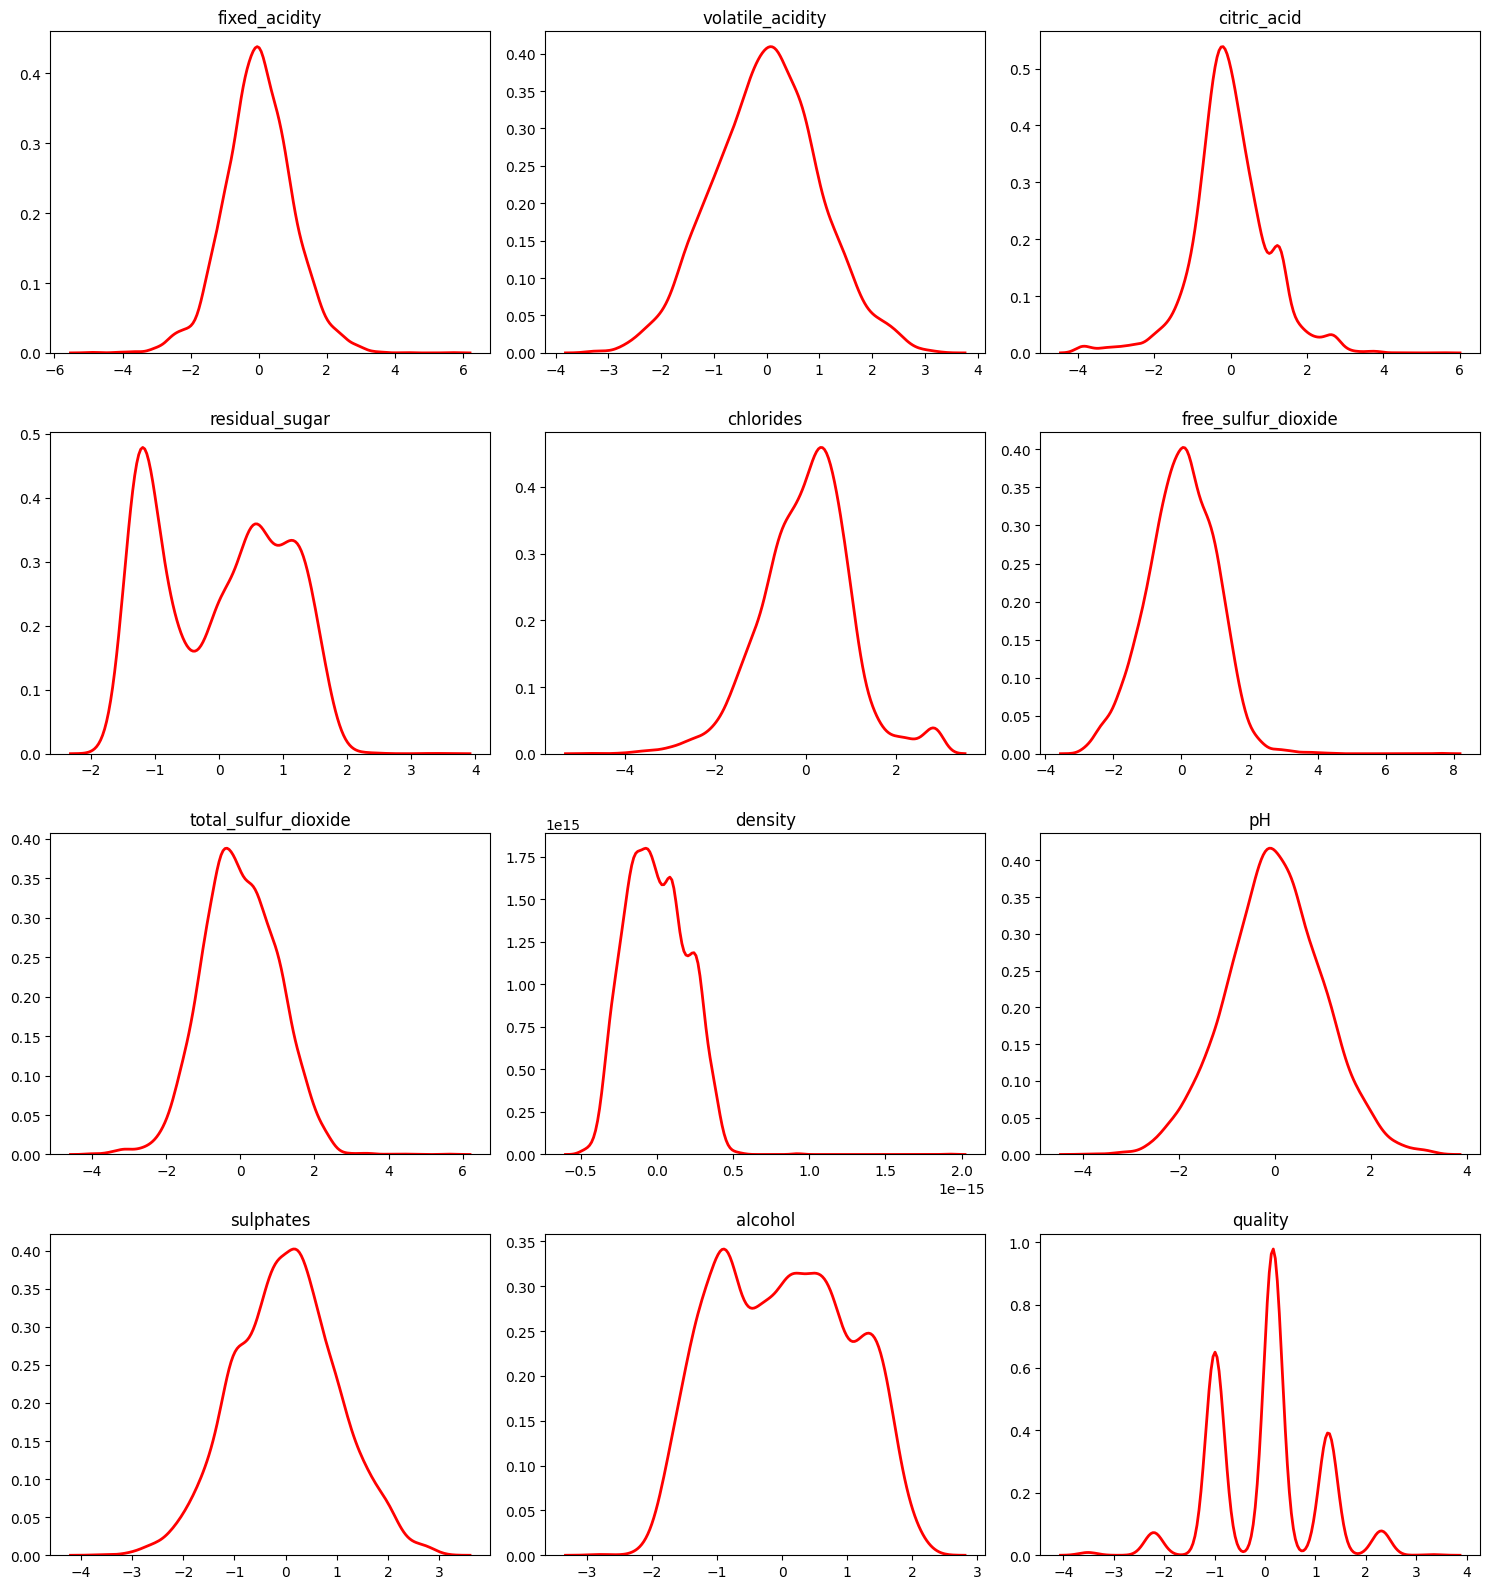

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
import math


num_cols = df.select_dtypes(include="number").columns
pt = PowerTransformer(method="yeo-johnson")
df_transformed = pd.DataFrame(pt.fit_transform(df[num_cols]), columns=num_cols)

n_cols = 3  
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(15, n_rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(df_transformed[col], color="red", linewidth=2)
    plt.title(f"{col}")
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()


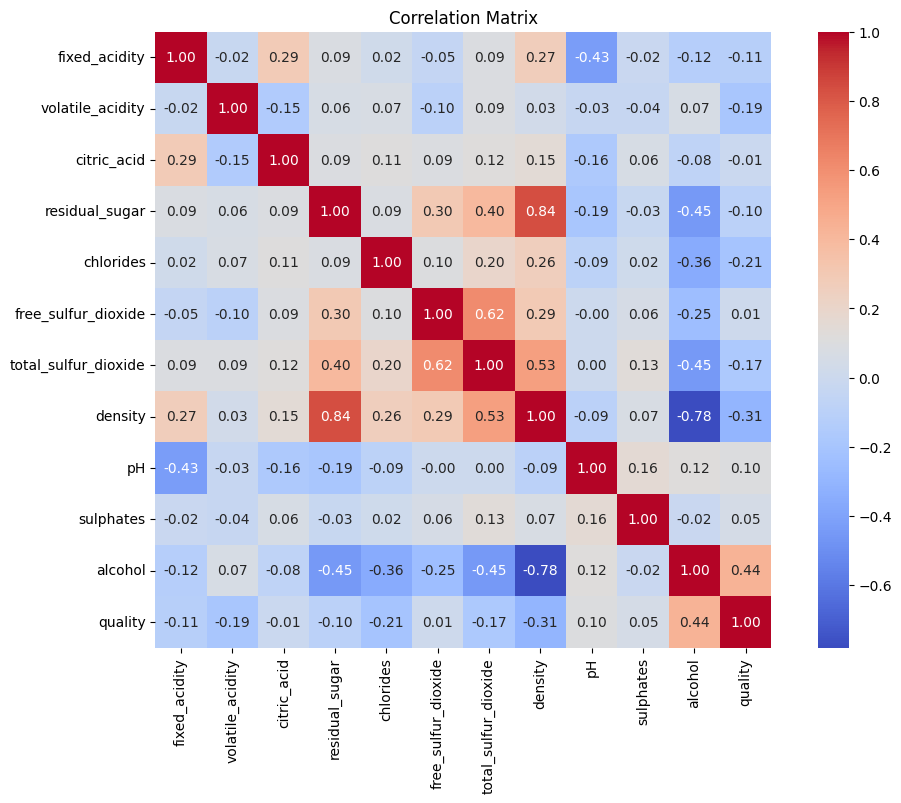

In [29]:
corr = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix")
plt.show()


In [31]:
corr_matrix = df.corr().abs().unstack().sort_values(ascending=False)
corr_pairs = corr_matrix[(corr_matrix < 1)]

top_corr = corr_pairs.index[0]  
col_to_drop = top_corr[1]  

df_reduced = df.drop(columns=[col_to_drop])
print(f"Dropped column: {col_to_drop}")


Dropped column: density


In [33]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

df.drop(columns=to_drop, inplace=True)
print("Dropped columns:", to_drop)
print("Remaining columns:", df.columns.tolist())


Dropped columns: ['density']
Remaining columns: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol', 'quality']


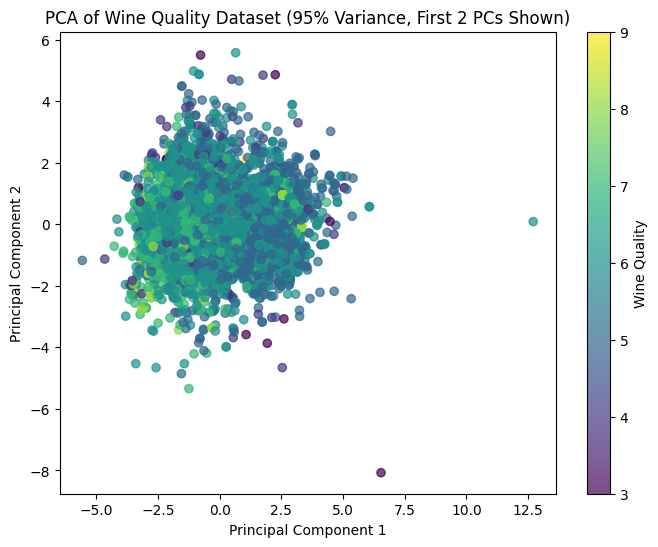

Number of components chosen to explain 95% variance: 9
Explained variance ratio: [0.29293217 0.14320363 0.11106103 0.09259294 0.08848496 0.08534014
 0.06605437 0.05448713 0.03764942]
Cumulative variance explained: [0.29293217 0.4361358  0.54719683 0.63978977 0.72827474 0.81361487
 0.87966924 0.93415637 0.9718058 ]


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv('winequality-red.csv')
X = df.drop('quality', axis=1)
y = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca[:, :2], columns=['PC1', 'PC2'])
pca_df['quality'] = y.values

plt.figure(figsize=(8,6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['quality'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Wine Quality')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Quality Dataset (95% Variance, First 2 PCs Shown)')
plt.show()

print("Number of components chosen to explain 95% variance:", pca.n_components_)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative variance explained:", pca.explained_variance_ratio_.cumsum())



In [69]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import joblib

df = pd.read_csv("winequality-red.csv")
df = df.drop(columns=["density"])
X = df.drop("quality", axis=1)
y = df["quality"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42, k_neighbors=2)
X_res, y_res = smote.fit_resample(X_scaled, y)

n_components = min(8, X_res.shape[1])
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X_res)

processed_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
processed_df["quality"] = y_res
processed_df.to_csv("wine_processed_pca.csv", index=False)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, test_size=0.2, random_state=42, stratify=y_res)

rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight="balanced")
svc = SVC(random_state=42, probability=True)
dt = DecisionTreeClassifier(random_state=42)

rf_param = {"n_estimators": [100, 200], "max_depth": [None, 10]}
svc_param = {"C": [1, 10], "kernel": ["rbf"], "gamma": ["scale"]}
dt_param = {"max_depth": [None, 10], "min_samples_split": [2, 5]}

rs_rf = RandomizedSearchCV(rf, rf_param, n_iter=2, scoring="f1_macro", cv=2, random_state=42, n_jobs=-1, verbose=1)
rs_svc = RandomizedSearchCV(svc, svc_param, n_iter=2, scoring="f1_macro", cv=2, random_state=42, n_jobs=-1, verbose=1)
rs_dt = RandomizedSearchCV(dt, dt_param, n_iter=2, scoring="f1_macro", cv=2, random_state=42, n_jobs=-1, verbose=1)

rs_rf.fit(X_train, y_train)
rs_svc.fit(X_train, y_train)
rs_dt.fit(X_train, y_train)

models = {"RandomForest": rs_rf.best_estimator_, "SVM": rs_svc.best_estimator_, "DecisionTree": rs_dt.best_estimator_}

results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="macro", zero_division=0)
    rec = recall_score(y_test, y_pred, average="macro", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="macro", zero_division=0)
    results[name] = {"model": model, "accuracy": acc, "precision": prec, "recall": rec, "f1": f1}

best_name = max(results.keys(), key=lambda k: results[k]["f1"])
best_model = results[best_name]["model"]

print("Results")
for k, v in results.items():
    print(k, v["accuracy"], v["precision"], v["recall"], v["f1"])

print("Best model by F1:", best_name)
print(classification_report(y_test, best_model.predict(X_test)))
print(confusion_matrix(y_test, best_model.predict(X_test)))

joblib.dump(best_model, "best_model.pkl")
joblib.dump({"scaler": scaler, "pca": pca, "feature_columns": list(X.columns)}, "preprocessing_artifacts.pkl")






Fitting 2 folds for each of 2 candidates, totalling 4 fits
Fitting 2 folds for each of 2 candidates, totalling 4 fits
Fitting 2 folds for each of 2 candidates, totalling 4 fits
Results
RandomForest 0.9135802469135802 0.9121834839634521 0.9136297074224181 0.9125248260994303
SVM 0.8044184535412605 0.7945716814307644 0.8045321421175636 0.7952094130259338
DecisionTree 0.8336582196231319 0.8340335633306607 0.8337314735378517 0.8337690032905795
Best model by F1: RandomForest
              precision    recall  f1-score   support

           3       0.99      0.99      0.99       439
           4       0.96      0.99      0.98       439
           5       0.82      0.86      0.84       440
           6       0.78      0.70      0.74       440
           7       0.85      0.86      0.86       440
           8       0.98      0.99      0.99       440
           9       1.00      1.00      1.00       440

    accuracy                           0.91      3078
   macro avg       0.91      0.91     

['preprocessing_artifacts.pkl']

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv("winequality-red.csv")

X = df.drop(columns=['quality'])
y = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['quality'] = y



loadings = pca.components_.T
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=X.columns)
print(loadings_df)

                           PC1       PC2
fixed acidity         0.157218  0.587558
volatile acidity      0.005089 -0.051728
citric acid           0.144050  0.345295
residual sugar        0.427408 -0.008749
chlorides             0.212011  0.008800
free sulfur dioxide   0.300334 -0.290355
total sulfur dioxide  0.406652 -0.244032
density               0.511524 -0.006297
pH                   -0.128832 -0.581344
sulphates             0.043379 -0.222695
alcohol              -0.437238  0.035569
